# Problema 2
## Descripción:
En el siguiente problema, se presenta un conjunto de datos sobre diferentes variedades de frijoles secos. El objetivo es desarrollar un modelo de clasificación que pueda distinguir entre siete variedades registradas de frijoles secos, utilizando características como forma, tamaño, tipo y estructura. Se utilizó un sistema de visión por computadora para obtener imágenes de los granos de frijol y luego se llevó a cabo la segmentación y extracción de características para obtener un total de 16 atributos, incluidas 12 dimensiones y 4 formas.

## Dataset:
El dataset proporcionado incluye las siguientes variables para cada paciente:
- Area (A): El área de una zona de frijol y el número de píxeles dentro de sus límites.
- Perimeter (P): La circunferencia del frijol se define como la longitud de su borde.
- Major axis length (L): La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.
- Minor axis length (l): La línea más larga que se puede dibujar desde el frijol mientras está perpendicular al eje principal.
- Eccentricity (Ec): Excentricidad de la elipse que tiene los mismos momentos que la región.
- Convex area (C): Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
- Equivalent diameter (Ed): El diámetro de un círculo que tiene el mismo área que el área de una semilla de frijol.
- Extent (Ex): La relación de los píxeles en el cuadro delimitador con respecto al área del frijol.
- Solidity (S): También conocida como convexidad. La relación de los píxeles en la envoltura convexa con respecto a los que se encuentran en los frijoles.
- Compactness (CO): Mide la redondez de un objeto: Ed/L.
- ShapeFactor1 (SF1).
- ShapeFactor2 (SF2).
- ShapeFactor3 (SF3).
- ShapeFactor4 (SF4).
- Class: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira.
## Objetivo:
Utilizando el conjunto de datos proporcionado, el objetivo es construir un modelo de clasificación que pueda predecir con precisión la variedad de frijol seco basándose en las características mencionadas anteriormente. Se emplearán técnicas de aprendizaje automático, específicamente redes neuronales, para entrenar y evaluar el modelo.
Además, se requiere que el alumno calcule y agregue al conjunto de datos las siguientes características:
- Aspect ratio (K): Relación entre la longitud del eje mayor (L) y la longitud del eje menor (l) .
- Roundness (R): Se debe calcular utilizando la fórmula (4piA)/(P^2).
Estas nuevas características calculadas se utilizarán como parte del conjunto de datos para el entrenamiento y evaluación del modelo de clasificación

# Preparacion del entorno

## Descarga del dataset

In [24]:
!pip install -q gdown

In [25]:
# Importar librerias para descargar, descomprimir y asignar varibles del dataset
import gdown
import zipfile
from pathlib import Path
import os

In [26]:
gdown.download('https://drive.google.com/uc?id=1kAn7K7pP7BzZj1BhLix_iJAts8CzY4E2')

with zipfile.ZipFile('TP1-2-Dry-Bean-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-2B')

Downloading...
From: https://drive.google.com/uc?id=1kAn7K7pP7BzZj1BhLix_iJAts8CzY4E2
To: /content/TP1-2-Dry-Bean-Dataset.zip
100%|██████████| 1.33M/1.33M [00:00<00:00, 92.9MB/s]


## Importacion de librerias

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.layers import Input, RandomFlip, RandomContrast, RandomTranslation, Flatten, Dropout
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Rescaling
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

from math import pi


import random
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [28]:

file_path = '/content/TP1-2B/TP1-2-Dry-Bean-Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Analisis exploratorio de datos
En esta seccion se explora el conjunto de datos con el que se va a trabajar, y se realizan algunas graficas simples de los mismos.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   Eccentricity     13611 non-null  float64
 5   ConvexArea       13611 non-null  int64  
 6   EquivDiameter    13611 non-null  float64
 7   Extent           13611 non-null  float64
 8   Solidity         13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     13611 non-null  float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
 14  Class            13611 non-null  object 
dtypes: float64(12), int64(2), object(1)
memory usage: 1.6+ MB


Todas las variables son numericas excepto la variable objetivo de Clase

In [30]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,0.750895,53768.200206,253.064220,0.749733,0.987143,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.092002,29774.915817,59.177120,0.049086,0.004660,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,0.715928,36714.500000,215.068003,0.718634,0.985670,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,0.764441,45178.000000,238.438026,0.759859,0.988283,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,0.810466,62294.000000,279.446467,0.786851,0.990013,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,0.911423,263261.000000,569.374358,0.866195,0.994677,0.987303,0.010451,0.003665,0.974767,0.999733


In [31]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Class'],
      dtype='object')

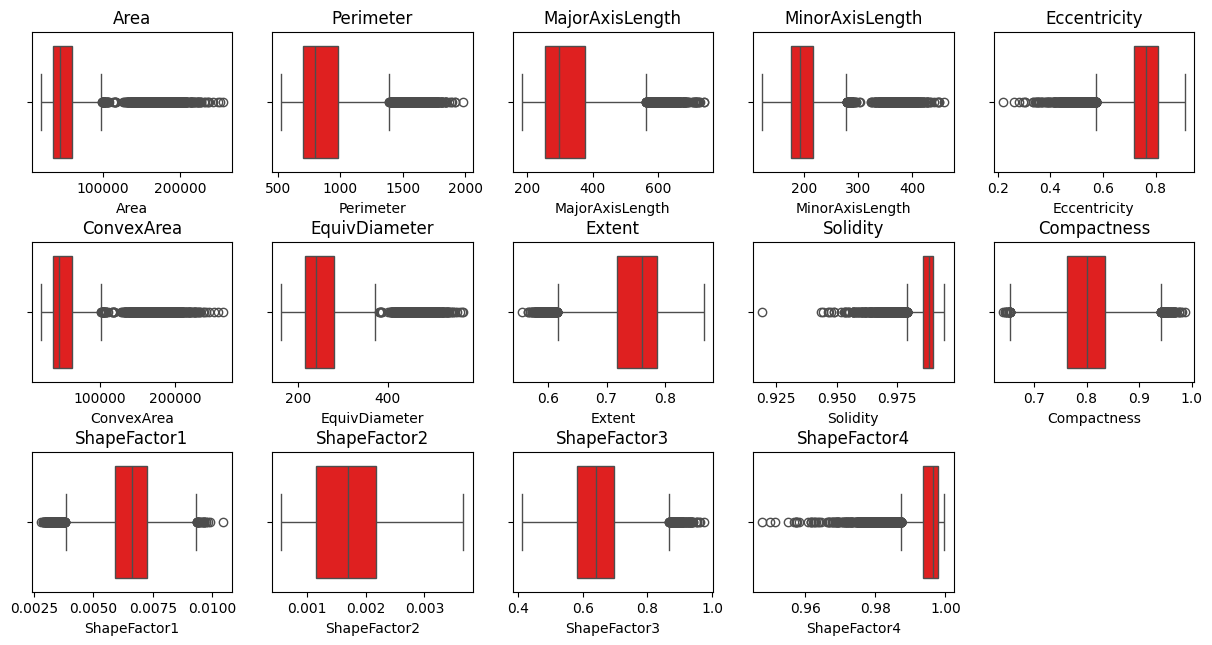

In [32]:
numeric_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=df[column], color = 'red')
    plt.title(column)
plt.subplots_adjust(hspace=0.5)


plt.show()




Se observan para casi todas las clases valores fuera del rango de los whiskers del grafico de cajas. Lo que sugiere cierta variabilidad entre las clases de frijoles.

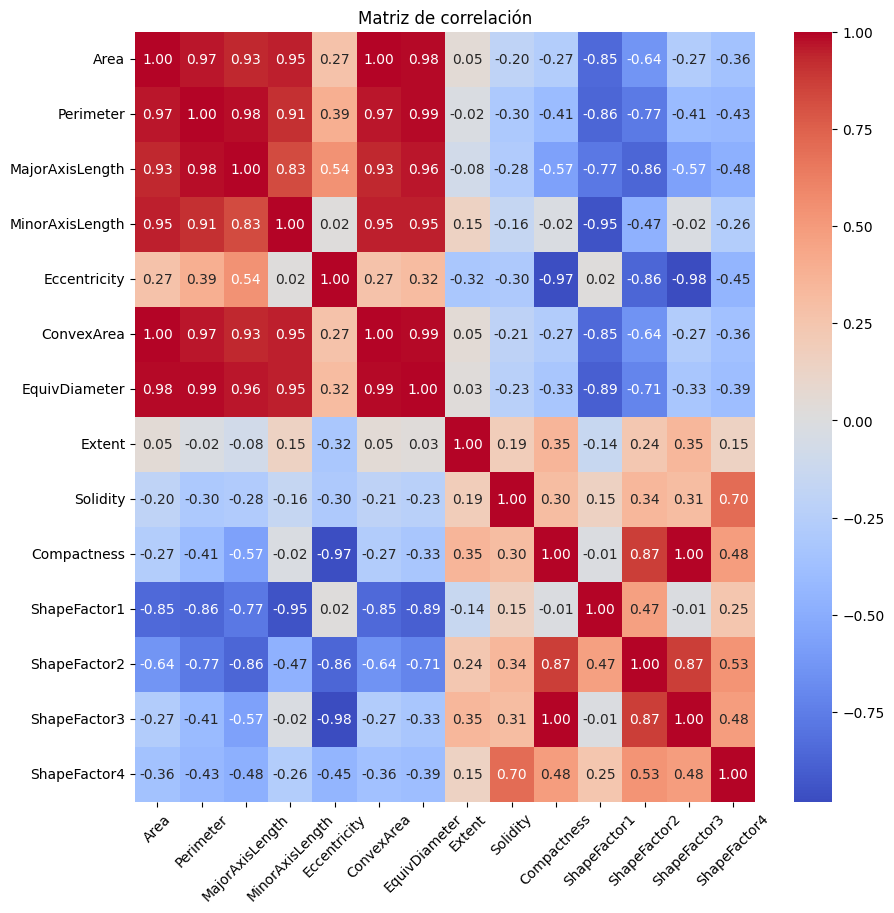

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico =  df.drop('Class', axis = 1)

# Calcula la matriz de correlación
correlation_matrix = df_numerico.corr()

plt.figure(figsize = (10, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation = 45)
plt.title("Matriz de correlación")
plt.show()

Podemos ver como las variables referidas a calculos geometricos tienen una muy fuerte relacion lineal entre ellos, puesto que se usan como parte del calculo entre si. Hay otro grupo de variables que tienen tambien correlaciones lineales muy fuertes, por lo que podemos dividir al grupo de variables en 2 subgrupos de alta correlacion lineal.

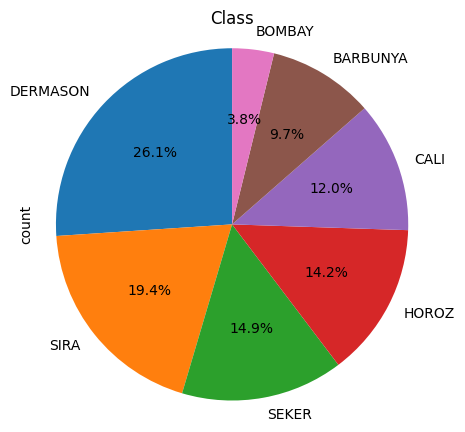

In [34]:
activities_counts = df['Class'].value_counts()


plt.figure(figsize=(5, 5))
activities_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)


plt.title('Class')

plt.axis('equal')
plt.show()

No se observa un desbalance entre la cantidad de registros de cada clase que requiera acciones de balanceo.

# Construccion de la Red Neuronal

In [35]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [36]:
df['Aspect ratio'] = df['MajorAxisLength'] / df['MinorAxisLength']

df['Roundness'] = (4 * pi * df['Area']) / (df['Perimeter'] ** 2)

Calculo de variables Aspect Ratio y Roundness, que se agregan al dataset

In [37]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Aspect ratio,Roundness
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,1.197191,0.958027
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1.097356,0.887034
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,1.209713,0.947849
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,1.153638,0.903936
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,1.060798,0.984877


Roundness (R): Se debe calcular utilizando la fórmula (4piA)/(P^2). Estas nuevas características calculadas se utilizarán como parte del conjunto de datos para el entrenamiento y evaluación del modelo de clasificación

In [38]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Class'])  # Características
y = df['Class']  # Variable objetivo

# Normalizar las características
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# Inspeccionar los datos
print("Número de muestras de entrenamiento:", len(X_train))
print("Número de muestras de validación:", len(X_val))
print("Número de características:", X.shape[1])

Número de muestras de entrenamiento: 10888
Número de muestras de validación: 2723
Número de características: 16


Creacion de los conjuntos de entrenamiento y prueba. Escalado de los datos.

In [39]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las clases de tipo string a números enteros
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

y_train = to_categorical(y_train_encoded, 7)
y_val = to_categorical(y_val_encoded, 7)

In [55]:
#classes_val = label_encoder.inverse_transform(y_val_encoded)
# Print the decoded class labels for each vector
#print("\nClases para el conjunto de validación:")
#print(classes_val)

Codificacion de la variable objetivo
- Las clases se codifican en vectores para facilitar la interpretacion y evitar cierto sesgo numerico que el modelo puede generar relacionando clases que deberian ser independientes.

In [40]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Chequeo de la variable objetivo

In [69]:
def build_model(input_shape):
    i = Input(input_shape)

    x = Dense(512, activation='relu')(i)
    #x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    #x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(64, activation='relu')(x)

    x = Dense(7, activation='softmax')(x)
    #2, activation='softmax' probar !!!

    return tf.keras.Model(inputs=[i], outputs=[x])


In [70]:

# Construir el modelo
print("Construyendo el modelo")
model = build_model(input_shape=X_train.shape[1:])
#optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

Construyendo el modelo


In [71]:

# Entrenar el modelo
print("Entrenando el modelo")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)

Entrenando el modelo
Epoch 1/15
341/341 [==============================] - 3s 5ms/step - loss: 0.3645 - accuracy: 0.8774 - val_loss: 0.2812 - val_accuracy: 0.8953
Epoch 2/15
341/341 [==============================] - 2s 5ms/step - loss: 0.2378 - accuracy: 0.9145 - val_loss: 0.2027 - val_accuracy: 0.9284
Epoch 3/15
341/341 [==============================] - 2s 5ms/step - loss: 0.2241 - accuracy: 0.9199 - val_loss: 0.2026 - val_accuracy: 0.9251
Epoch 4/15
341/341 [==============================] - 2s 6ms/step - loss: 0.2169 - accuracy: 0.9242 - val_loss: 0.2150 - val_accuracy: 0.9218
Epoch 5/15
341/341 [==============================] - 2s 5ms/step - loss: 0.2077 - accuracy: 0.9242 - val_loss: 0.2119 - val_accuracy: 0.9310
Epoch 6/15
341/341 [==============================] - 2s 4ms/step - loss: 0.2075 - accuracy: 0.9234 - val_loss: 0.1989 - val_accuracy: 0.9332
Epoch 7/15
341/341 [==============================] - 2s 4ms/step - loss: 0.2022 - accuracy: 0.9282 - val_loss: 0.1934 - val_ac

# Analisis de los resultados

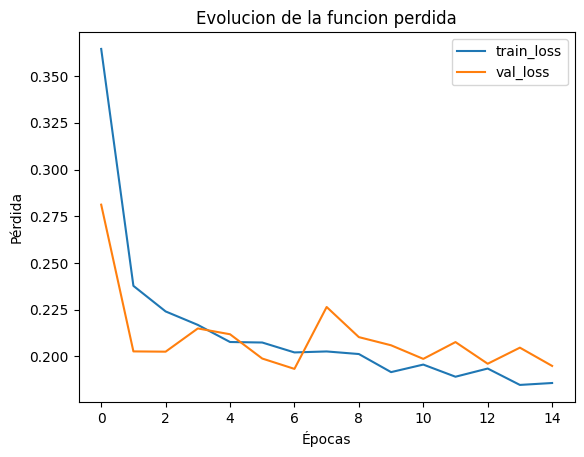

In [72]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolucion de la funcion perdida')
plt.legend()
plt.show()

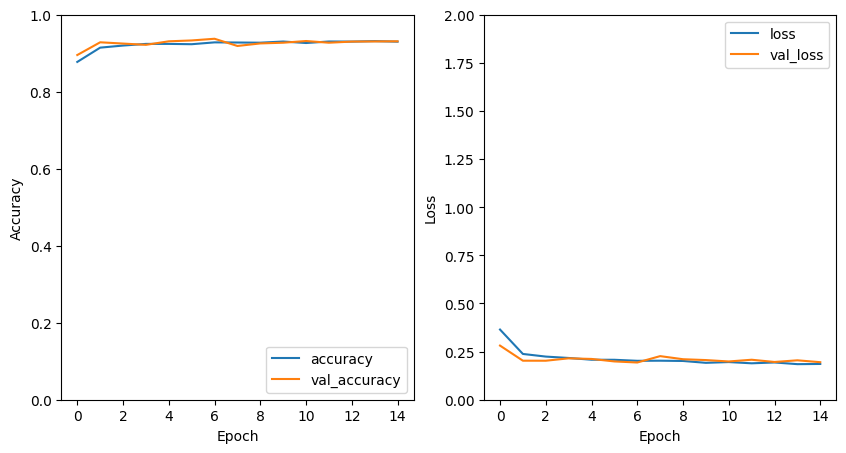

In [73]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')

In [74]:
from sklearn.metrics import classification_report

# Predecir en el conjunto de prueba
y_pred = model.predict(X_val)

# Obtener las clases predichas (en forma de índices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las clases verdaderas (en forma de índices)
y_true = np.argmax(y_val, axis=1)
nombres_clases = []
# Crear el informe de clasificación
report = classification_report(y_true, y_pred_classes)#target_names=nombres_clases

# Imprimir el informe de clasificación
print(report)

86/86 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       261
           1       1.00      1.00      1.00       117
           2       0.96      0.91      0.94       317
           3       0.90      0.94      0.92       671
           4       0.96      0.97      0.96       408
           5       0.96      0.96      0.96       413
           6       0.90      0.87      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Reporte de clasificacion para ver mas metricas del modelo, y sus valores para cada clase en particular.


# Conclusiones

Se obtuvieron valores de accuracy cercanos al .93 tanto en entrenamiento como en validacion. En el reporte de metricas por clase vemos un buen rendimiento en todas, teniendo valores inferiores a .90 solo la clase 6, mientras que en otra clase se alcanza valores de 1.